In [1]:
from demon import *

In [2]:
# a pretrained model
np.random.seed(324)
low, high, sample_size = -20, 20, 100
Xtr = np.random.uniform(low, high, sample_size)
Ytr = generate_response(Xtr, 1)

kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(Xtr.reshape(-1,1), Ytr.reshape(-1,1), kernel)

# optimize the model parameters
model.optimize()
f = model.predict

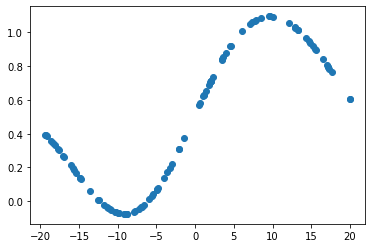

In [3]:
plt.scatter(Xtr, f(Xtr.reshape(-1,1))[0])

# Fixing mean

In [4]:
np.random.seed(324)
n_list = [10, 50, 100]
fp_list, icp_list, cp_list = [],[], []
for n in n_list:
    fp, icp, cp = compute_p(f, generate_data, WCP, n, 10000)
    fp_list.append(fp)
    icp_list.append(icp)
    cp_list.append(cp)

# Compute probability of getting finite prediction intervals

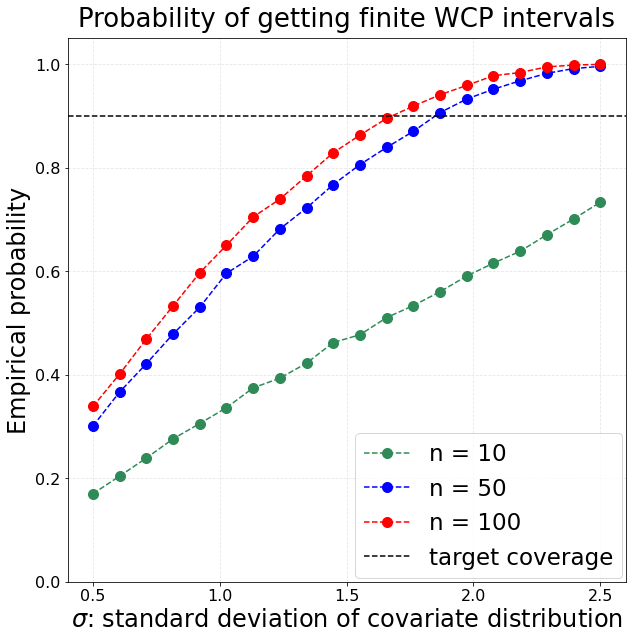

In [5]:
stds = np.linspace(0.5, 2.5, num = 20)

# color list
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(stds, fp_list[0], marker='o',  markersize=10, linestyle='--', color='seagreen', label='n = 10')
plt.plot(stds, fp_list[1], marker='o',  markersize=10, linestyle='--', color='blue', label='n = 50')
plt.plot(stds, fp_list[2], marker='o',  markersize=10, linestyle='--', color='red', label='n = 100')
plt.axhline(y= 0.9, color='black', linestyle='--', label = 'target coverage')

plt.yticks(np.arange(0, 1.01, 0.2))
plt.xticks(np.arange(0.5, 2.51, 0.5))
plt.ylim(0, 1.05)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True,  linestyle='--', alpha=0.3)
plt.legend(loc = 'lower right', fontsize = 23, borderaxespad=0.15)

plt.xlabel(r'$\sigma$: standard deviation of covariate distribution', fontsize=24)
plt.ylabel('Empirical probability', fontsize=24)
plt.title('Probability of getting finite WCP intervals', fontsize=26, y = 1.01)

plt.savefig('/Users/mufangying/Desktop/ICP/figures/'+'fix_mean_finite_prob' +'.pdf')

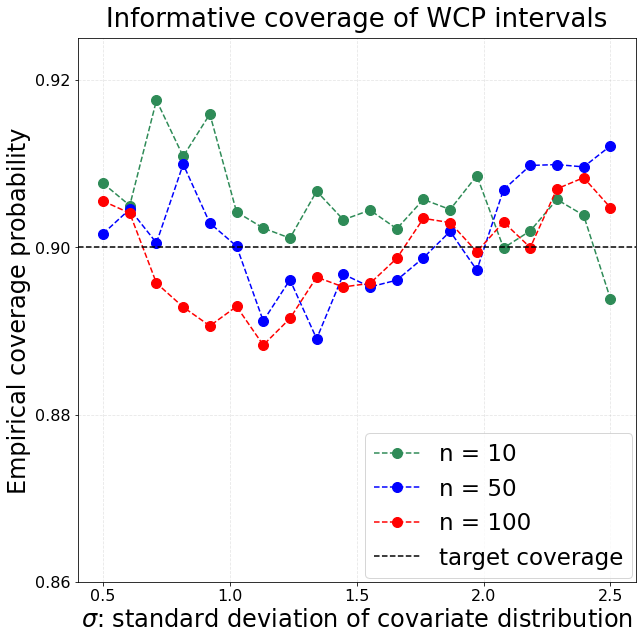

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))


plt.plot(stds, icp_list[0], marker='o', 
         markersize=10, linestyle='--', color='seagreen', label='n = 10')
plt.plot(stds, icp_list[1], marker='o', 
         markersize=10, linestyle='--', color='blue', label='n = 50')
plt.plot(stds, icp_list[2], marker='o',  
         markersize=10, linestyle='--', color='red', label='n = 100')
plt.axhline(y= 0.9, color='black', linestyle='--', label = 'target coverage')


plt.yticks(np.arange(0.86, 0.93, 0.02))
plt.xticks(np.arange(0.5, 2.51, 0.5))
plt.ylim(0.86, 0.925)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True,  linestyle='--', alpha=0.3)
plt.legend(loc = 'lower right', fontsize = 23, borderaxespad=0.15)

plt.xlabel(r'$\sigma$: standard deviation of covariate distribution', fontsize=24)
plt.ylabel('Empirical coverage probability', fontsize=24)
plt.title('Informative coverage of WCP intervals', fontsize=26, y = 1.01)
plt.savefig('/Users/mufangying/Desktop/ICP/figures/'+'fix_mean_infor_prob' +'.pdf')

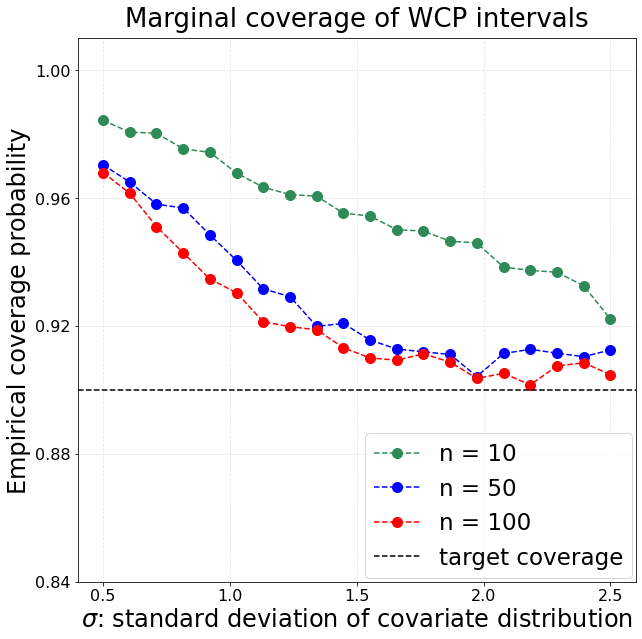

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(stds, cp_list[0], marker='o', 
         markersize=10, linestyle='--', color='seagreen', label='n = 10')
plt.plot(stds, cp_list[1], marker='o', 
         markersize=10, linestyle='--', color='blue', label='n = 50')
plt.plot(stds, cp_list[2], marker='o',  
         markersize=10, linestyle='--', color='red', label='n = 100')
plt.axhline(y= 0.9, color='black', linestyle='--', label = 'target coverage')

plt.yticks(np.arange(0.84, 1.01, 0.04))
plt.xticks(np.arange(0.5, 2.51, 0.5))
plt.ylim(0.84, 1.01)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True,  linestyle='--', alpha=0.3)
plt.legend(loc = 'lower right', fontsize = 23, borderaxespad=0.15)

plt.xlabel(r'$\sigma$: standard deviation of covariate distribution', fontsize=24)
plt.ylabel('Empirical coverage probability', fontsize=24)
plt.title('Marginal coverage of WCP intervals', fontsize=26, y = 1.01)

plt.savefig('/Users/mufangying/Desktop/ICP/figures/'+'fix_mean_marg_prob' +'.pdf')

#  Fix variance

In [8]:
np.random.seed(324)
n_list = [10, 50, 100]
fp_list, icp_list, cp_list = [],[], []
for n in n_list:
    fp, icp, cp = compute_pp(f, generate_data, WCP, n, 10000)
    fp_list.append(fp)
    icp_list.append(icp)
    cp_list.append(cp)

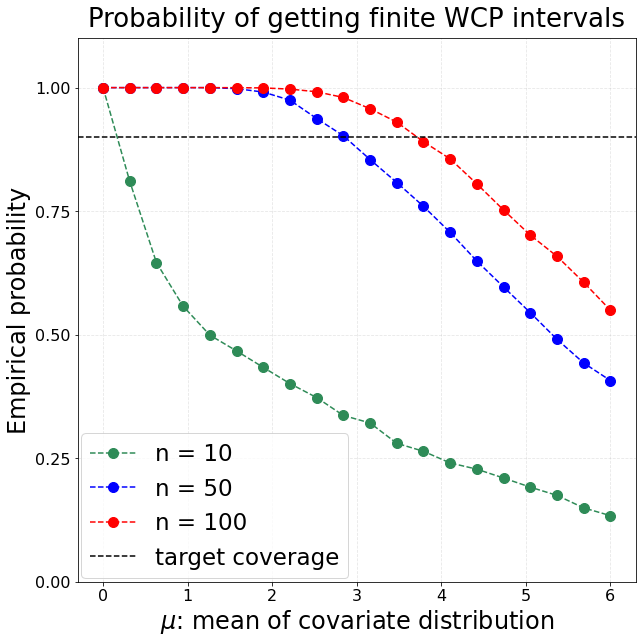

In [9]:
mus = np.linspace(0, 6, num = 20)


fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(mus, fp_list[0], marker='o',  markersize=10, linestyle='--', color='seagreen', label='n = 10')
plt.plot(mus, fp_list[1], marker='o',  markersize=10, linestyle='--', color='blue', label='n = 50')
plt.plot(mus, fp_list[2], marker='o',  markersize=10, linestyle='--', color='red', label='n = 100')
plt.axhline(y= 0.9, color='black', linestyle='--', label = 'target coverage')

plt.yticks(np.arange(0, 1.01, 0.25))
plt.ylim(0, 1.1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True,  linestyle='--', alpha=0.3)
plt.legend(loc = 'lower left', fontsize = 23, borderaxespad=0.15)

plt.xlabel(r'$\mu$: mean of covariate distribution', fontsize=24)
plt.ylabel('Empirical probability', fontsize=24)
plt.title('Probability of getting finite WCP intervals', fontsize=26, y = 1.01)

plt.savefig('/Users/mufangying/Desktop/ICP/figures/'+'fix_var_finite_prob' +'.pdf')

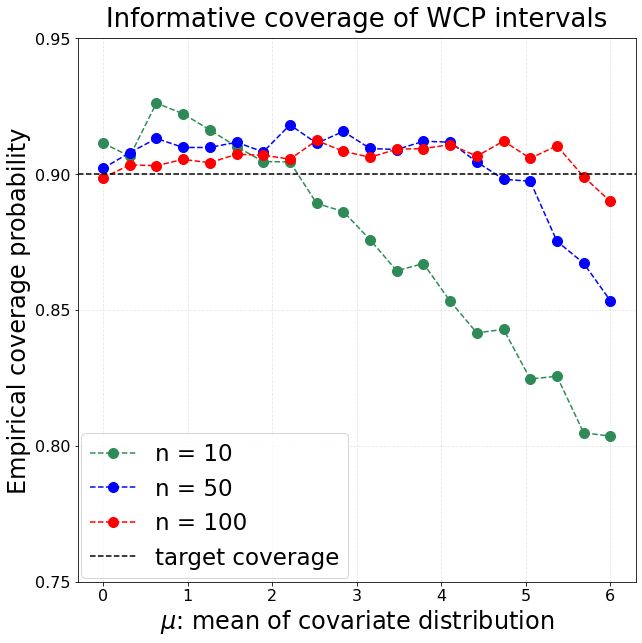

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(mus, icp_list[0], marker='o', 
         markersize=10, linestyle='--', color='seagreen', label='n = 10')
plt.plot(mus, icp_list[1], marker='o', 
         markersize=10, linestyle='--', color='blue', label='n = 50')
plt.plot(mus, icp_list[2], marker='o',  
         markersize=10, linestyle='--', color='red', label='n = 100')
plt.axhline(y= 0.9, color='black', linestyle='--', label = 'target coverage')


plt.yticks(np.arange(0.75, 0.96, 0.05))
plt.ylim(0.75, 0.95)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True,  linestyle='--', alpha=0.3)
plt.legend(loc = 'lower left', fontsize = 23, borderaxespad=0.15)

plt.xlabel(r'$\mu$: mean of covariate distribution', fontsize=24)
plt.ylabel('Empirical coverage probability', fontsize=24)
plt.title('Informative coverage of WCP intervals', fontsize=26, y = 1.01)
plt.savefig('/Users/mufangying/Desktop/ICP/figures/'+'fix_var_infor_prob' +'.pdf')

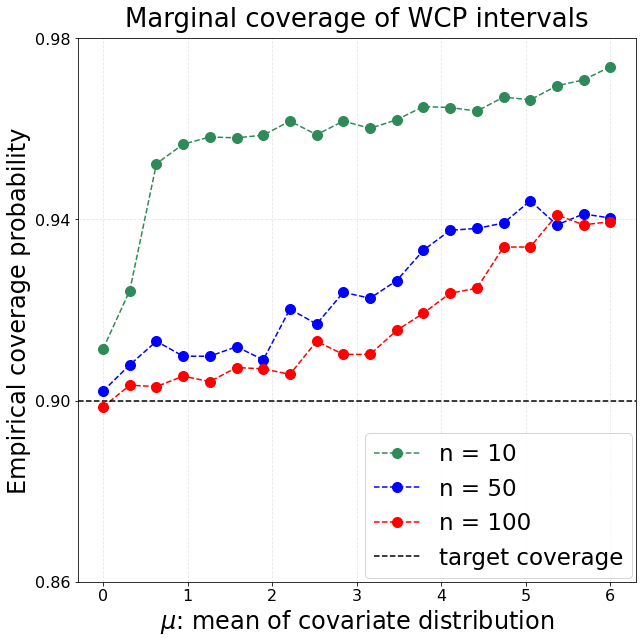

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(mus, cp_list[0], marker='o', 
         markersize=10, linestyle='--', color='seagreen', label='n = 10')
plt.plot(mus, cp_list[1], marker='o', 
         markersize=10, linestyle='--', color='blue', label='n = 50')
plt.plot(mus, cp_list[2], marker='o',  
         markersize=10, linestyle='--', color='red', label='n = 100')
plt.axhline(y= 0.9, color='black', linestyle='--', label = 'target coverage')

plt.yticks(np.arange(0.86, 0.99, 0.04))
plt.ylim(0.86, 0.98)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True,  linestyle='--', alpha=0.3)
plt.legend(loc = 'lower right', fontsize = 23, borderaxespad=0.15)

plt.xlabel(r'$\mu$: mean of covariate distribution', fontsize=24)
plt.ylabel('Empirical coverage probability', fontsize=24)
plt.title('Marginal coverage of WCP intervals', fontsize=26, y = 1.01)

plt.savefig('/Users/mufangying/Desktop/ICP/figures/'+'fix_var_marg_prob' +'.pdf')